### Student Information
Name: Retnani Latifah

Student ID: 111062860

GitHub ID: 127463521

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

### Take Home Exercise Part


First, load necessary libraries and data for the take home exercise

In [1]:
### Begin Assignment Here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
#libraries
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### Exercise 2
Try some pandas function

In [8]:
X.iloc[3:7, lambda X: [0, 2]]  #show row 3 to 6 only for column text and category_name

,text,category_name
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian


In [9]:
#filtering using a condition
criterion = X['category_name'].map(lambda x: x.startswith('comp'))
X[criterion]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


In [10]:
X.isin([1,3]) 

,text,category,category_name
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


In [11]:
X.category[(X.category < 1) | (X.category > 2)]

2       3
3       3
4       3
5       3
6       3
       ..
2237    0
2246    3
2247    3
2249    3
2250    0
Name: category, Length: 1079, dtype: int64

In [12]:
X.loc[X.index[[0,2]],'category_name'] #combine position and label based

0             comp.graphics
2    soc.religion.christian
Name: category_name, dtype: object

In [13]:
labels = [1,10,15,20,100]

X1 = X.reindex(labels) #make different dataframe from certain indexes
X1

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
100,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism


In [14]:
X2 = X1.set_index('category_name') #change one of the column as index
X2

,text,category
category_name,,
comp.graphics,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
soc.religion.christian,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
comp.graphics,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1
soc.religion.christian,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Re...,0


In [15]:
X2.reset_index() #reset the index

,category_name,text,category
0,comp.graphics,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
1,soc.religion.christian,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
2,comp.graphics,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1
3,soc.religion.christian,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
4,alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Re...,0


#### Exercise 5
Missing Values

In [16]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [17]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

 Answer here

The one considered as missing values are only the first, second and fifth entries (index 0,1 and 4). This is because the
entries for index 2,3 and 5 are actually string not a null. All of these statements ('Nan', 'None', '') are considered string
due to the use of '' after  'missing_example' :
Meanwhile for index 0, it is the correct null which is defined by np.NaN, a statement to make a NaN entry using numpy library. 
As for index 1, there is no entry value for missing_value, thus it is considered as null / NaN. 
For index 4, it is defined by None, a python keyword to define null objects or variables

If all of them want to be considered as null then the ('Nan', 'None', '') need to be changed to either np.nan or None or
no entry at all. example is below

In [18]:
NA_dict1 = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': np.nan  },
           { 'id': 'D', 'missing_example': np.nan },
           { 'id': 'E', 'missing_example':  None },
           { 'id': 'F', 'missing_example': np.nan  }]
NA_df1 = pd.DataFrame(NA_dict1, columns = ['id','missing_example'])
NA_df1['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### Exercise 6

Any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X

Answer here

The data in X_sample is not in the order as their index (the rows), it is random. However, even if the sample code run 
several time, the same random sample will be shown (due to random_state being defined. The column order is the same. 
The number of each category in the sample is similar to the number of X data, around 45% of total of each category to make up
1000 data. In querying the X_sample data using X[:5], it will not show the data with index 0-4 like in X data,
but the data with other indexes stored in index 0-4 in the X_sample. It also worked when we query using iloc, but when we 
queried using X_sample.loc, it will give errors.

In [19]:
X_sample = X.sample(n=1000,random_state=42) #random state
X_sample[:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


In [20]:
X_sample.iloc[:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


In [21]:
#X_sample.loc[:5] #the output showed the error

#### Exercise 8 Bar Chart

Side-by-side comparison of the distribution between the two datasets,

<Axes: title={'center': 'Category distribution'}>

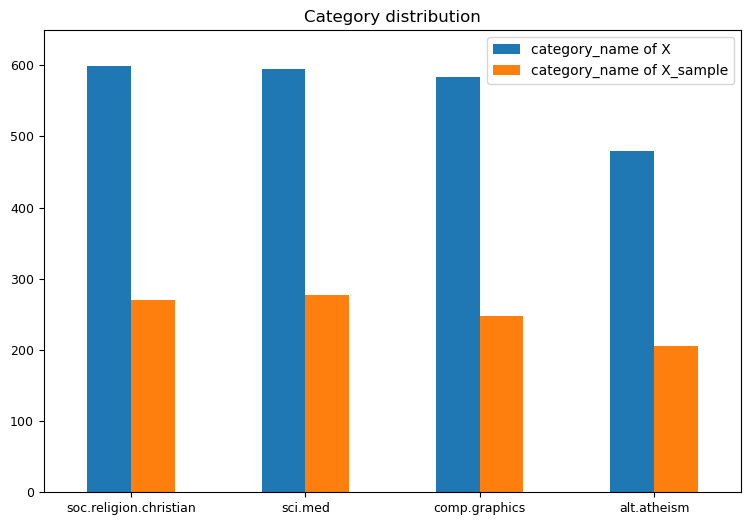

In [22]:
# Answer here

#make the counts of category_name as separate dataframe with the category_name as index
#for both X and X_sample, so there will be two dataframe
numofX = X.category_name.value_counts().rename_axis('unique_values').to_frame('category_name of X')
numofXSample = X_sample.category_name.value_counts().rename_axis('unique_values').to_frame('category_name of X_sample')

#combine the two dataframe into one, based on the index, and make the index as column (reset_index())
dfCountCat = pd.concat([numofX, numofXSample], axis=1).reset_index()

#calculate the highest bound 
upper_bound = max(X.category_name.value_counts() + 50)

#plot the chart side by side (in the y part)
dfCountCat.plot(kind = 'bar',
                x = 'unique_values',
                y = ['category_name of X', 'category_name of X_sample'],
                title = 'Category distribution',
                xlabel = '', #remove x label
                ylim = [0, upper_bound], 
                rot = 0, fontsize = 9, figsize = (9,6))

In [23]:
import nltk

#### Exercise 10
Verify what word the 1 in fifth record (beside the first one)

In [24]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [26]:
#answer for the question

print('The other feature which contain 1 is term :',count_vect.get_feature_names_out()[37:38])

The other feature which contain 1 is term : ['01']


In [27]:
#to make sure this is the right one in the array
X_counts[4:5, :38].toarray() 

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

#### Exercise 11 HeatMap

Modify the code to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Answer :
In this part,  I changed the vectorizer result to dataframe, so it can be sort by the sum of each column (term) in descending way. Next, show only top N frequency by slicing the dataframe from index 0 to the desired one (eg 20). To make a heatmap with y axis label, the index of the dataframe need a change to doc_1, doc_2, etc.. so in the visualization it can show. The heatmap will give the visualization of the frequency of terms which has high frequencies. The drawback of this method is it might take a bit of time to change from vectorizer to dataframe. 

In [28]:
X.text.tail()

2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, dtype: object

In [29]:
#make a dataframe of vectorizer for easier modification
dfVect = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out()) 
dfVect.head()

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#sort the column based on the frequencies of each terms
dfVectSort = dfVect[dfVect.sum().sort_values(ascending=False).index]
dfVectSort.head()

,the,of,to,and,is,in,that,it,you,for,...,pc386,pc5_b109,pc9_b109,pca,pcad3d,pcb,pcboard,pccvm,pcd7,íålittin
0,5,1,4,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,8,4,0,10,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
2,14,10,26,9,4,6,8,8,13,6,...,0,0,0,0,0,0,0,0,0,0
3,6,2,0,1,1,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,3,8,3,2,3,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import warnings
warnings.filterwarnings('ignore')

#in order to show doc label in heatmap, instead of index 0,1,2,...
dfVectSort['Doc']= ["doc_"+ str(i+1) for i in list(dfVectSort.index)]
dfVectSort = dfVectSort.set_index(dfVectSort['Doc'])
dfVectSort.head()

,the,of,to,and,is,in,that,it,you,for,...,pc5_b109,pc9_b109,pca,pcad3d,pcb,pcboard,pccvm,pcd7,íålittin,Doc
Doc,,,,,,,,,,,,,,,,,,,,,
doc_1,5,1,4,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,doc_1
doc_2,11,8,4,0,10,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,doc_2
doc_3,14,10,26,9,4,6,8,8,13,6,...,0,0,0,0,0,0,0,0,0,doc_3
doc_4,6,2,0,1,1,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,doc_4
doc_5,10,3,8,3,2,3,1,1,1,2,...,0,0,0,0,0,0,0,0,0,doc_5


<Axes: ylabel='Doc'>

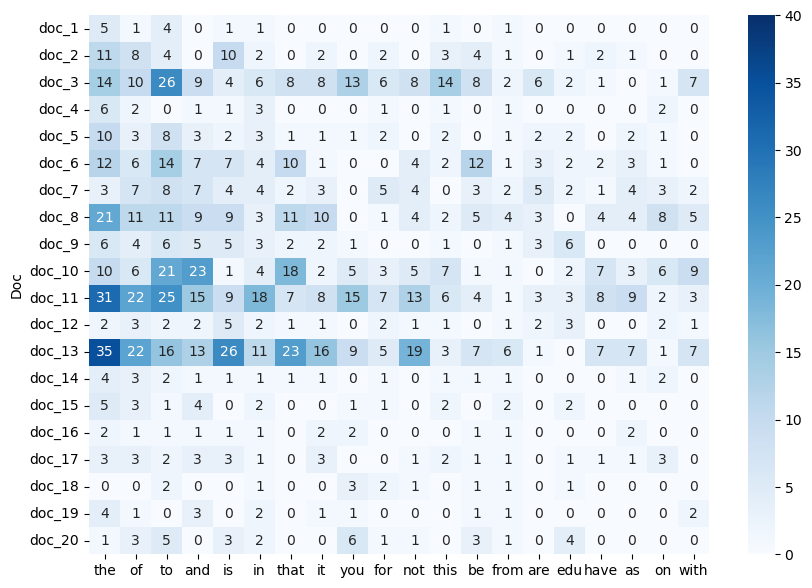

In [32]:
#show 20 highest frequency of terms

plt.subplots(figsize=(10, 7))
sns.heatmap(dfVectSort.iloc[:20,:20],              
    cmap="Blues",
    vmin=0, vmax=40, annot=True)

We can visualize word frequency using word cloud, the higher the frequency, the bigger and bolder the word, thus we can learn the meaningful words. below is the example. The word cloud remove some high frequency words like 'the', 'of', 'to, 'and' etc, however some of high occurence words that might not useful are still present. 

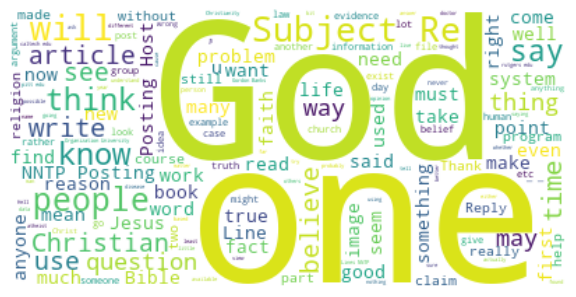

In [33]:
import helpers.text_analysis as ta

allwords = ''
for text in X.text:
    allwords += text

ta.plot_word_cloud(allwords)

#### Exercise 12

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

In [34]:
# Answer here
print(X_counts.shape)
X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced2.shape)

(2257, 35788)
(2257, 3)


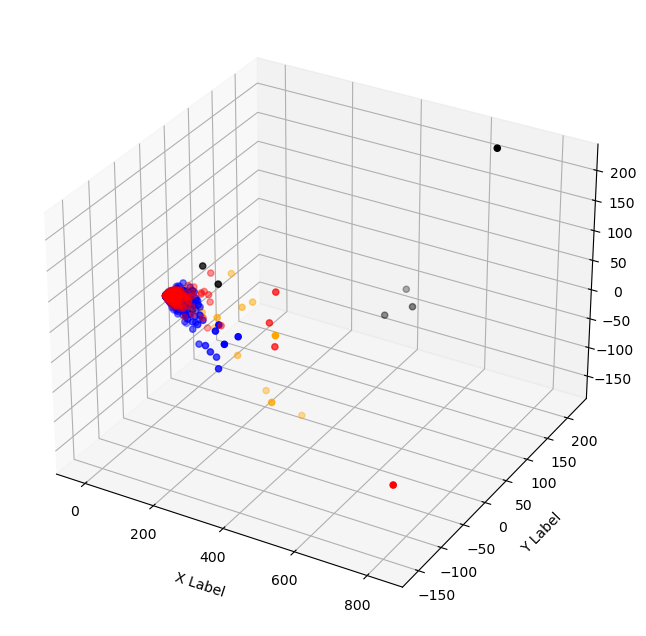

In [35]:
from mpl_toolkits import mplot3d

col = ['red', 'blue', 'black', 'orange']

#default angle
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced2[X['category_name'] == category].T[0]
    ys = X_reduced2[X['category_name'] == category].T[1]
    zs = X_reduced2[X['category_name'] == category].T[2]

    ax.scatter(xs, ys,zs, c = c, marker='o')
     
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

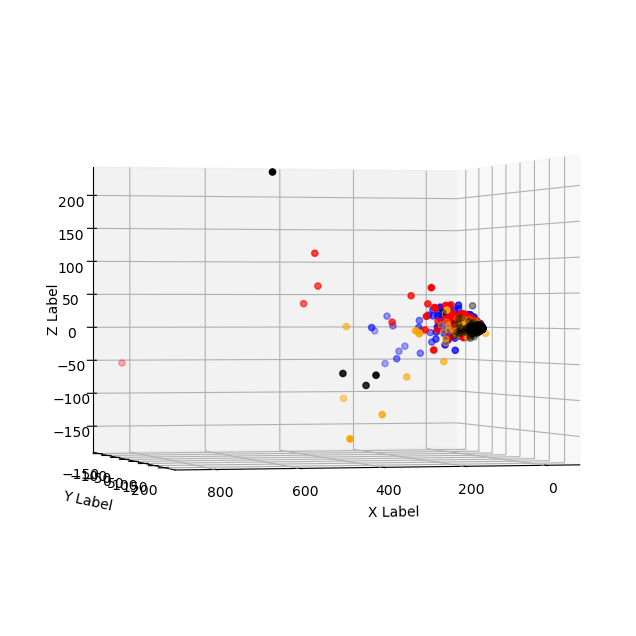

In [36]:
#the second angle
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced2[X['category_name'] == category].T[0]
    ys = X_reduced2[X['category_name'] == category].T[1]
    zs = X_reduced2[X['category_name'] == category].T[2]

    ax.scatter(xs, ys,zs, c = c, marker='o')
     
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.view_init(elev=0, azim=75, roll=0)  
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

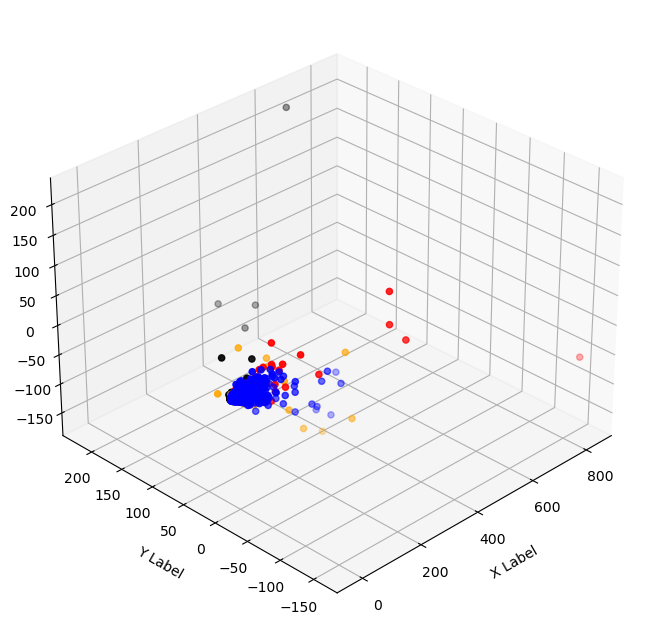

In [37]:
#third angle
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced2[X['category_name'] == category].T[0]
    ys = X_reduced2[X['category_name'] == category].T[1]
    zs = X_reduced2[X['category_name'] == category].T[2]

    ax.scatter(xs, ys,zs, c = c, marker='o')
     
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.view_init(elev=30, azim=225, roll=0)  
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

Observation result : by trying out different angle, we can check the distribution/visualization of each of categories. 
in one angle, it might look like that the other categories only shown a bit, however after changing the angle, we can see the hidden parts, thus we can then analyze them according to our needs. 

#### Exercise 13

a nicer interactive visualization with plotly

In [38]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

35788


In [39]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [40]:
#make a dataframe with the desired range of terms that we wanted to visualize, trying to visualize them all will slowdown
#everything, less than 1000 is good
termFreq = pd.DataFrame(
    {'term': count_vect.get_feature_names_out()[30000:30300], #take around 300 terms from around the middle of index
     'freq': term_frequencies[30000:30300]
    })

In [41]:
import plotly.graph_objects as go #first install plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

fig = go.Figure()

#this part use range, so that we can slide the image left and right, to try to see the figure better 
#not only a small vertical line
#the range slider is visible so we can use it to slide left and right, please short down the area, 
#so the image will get bigger
fig.add_trace(
    go.Bar(x=termFreq["term"], y=termFreq["freq"], marker_color=termFreq['freq'])).update_layout(
    xaxis={
        "range": [termFreq.iloc[-1]["term"], termFreq["term"].max()],
        "rangeslider": {"visible": True},
    },)

fig.show()


incase the fig is not shown
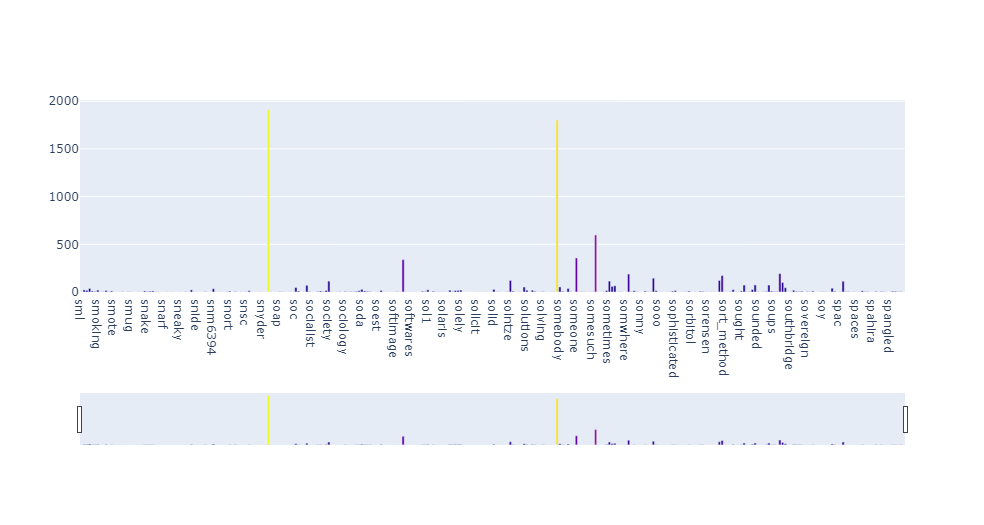

#### >>> **Exercise 14 (take home):** 
Reduce the number of vocabulary then visualize

In [42]:
#sort by largest frequency from the dataframe and take n terms
reduceTerm = termFreq.nlargest(20, 'freq') 

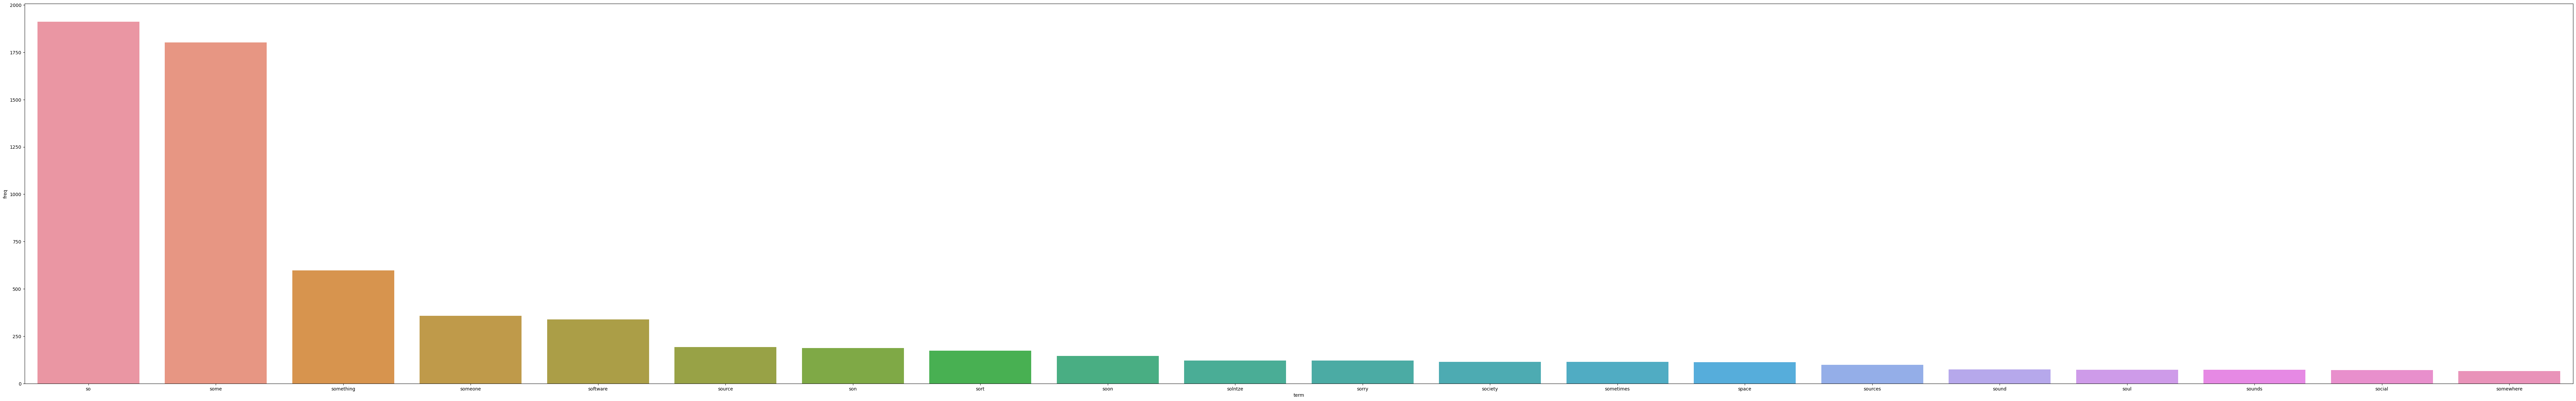

In [43]:
plt.subplots(figsize=(100, 15))
g = sns.barplot(x=reduceTerm.term, 
            y=reduceTerm.freq)
g.set_xticklabels(reduceTerm.term, rotation = 0);

In [44]:
import plotly.express as px
init_notebook_mode(connected=True)

#visualize the reduceTerm dataframe
fig = px.bar(reduceTerm, x='term', y='freq',color='freq',
             labels={'term':'term','freq':'freq'}, color_continuous_scale='sunset')
fig.show()

incase the fig is not shown
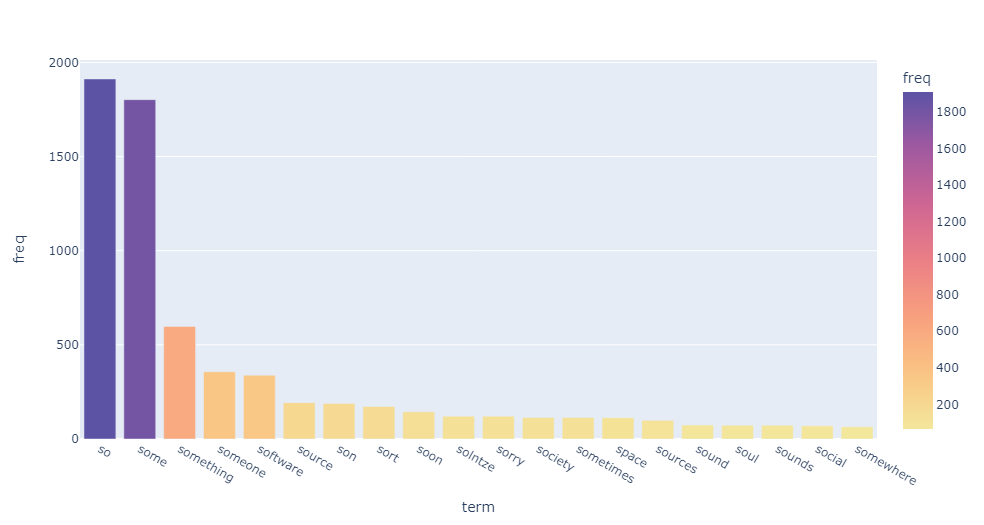

#### Exercise 15 

Sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaningful and you will be able to observe the so called long tail

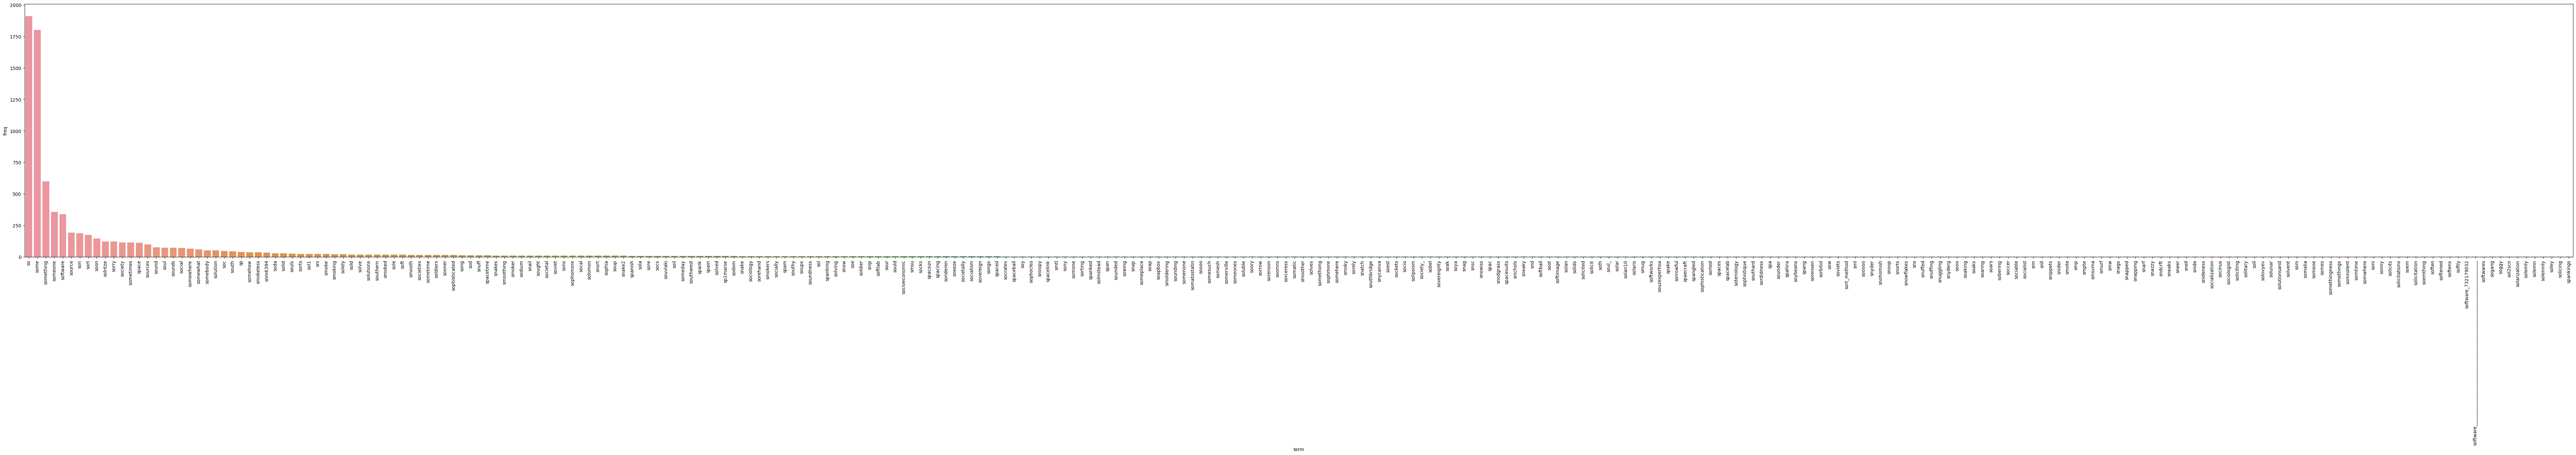

In [45]:
# Answer here

plt.subplots(figsize=(100, 10))

sortedtermFreq = termFreq.sort_values('freq',ascending=False)
g = sns.barplot(x=sortedtermFreq['term'], 
            y=sortedtermFreq['freq'])
g.set_xticklabels(sortedtermFreq['term'], rotation = 90);


#### Exercise 16

Generate the binarization using the category_name column instead. Does it work?

In [46]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [47]:
mlb = preprocessing.LabelBinarizer()

In [48]:
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [49]:
X[:-1]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
...,...,...,...,...,...
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med,"[From, :, Mark-Tarbell, @, suite.com, Subject,...","[0, 0, 1, 0]"
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 1, 0]"


the binarization using category_name is working. 

## Second Part

follow the same process from the DM2023-Lab1-Master on the new dataset.

### 1. Data Preparation

#### 1.1 Data Transformation

Load data, and change the data from text to dataframe

In [50]:
#load data, separate it by delimiter '\t', make sure header None so the first line will not be column name

dfAmazon = pd.read_csv(r'\Users\retna\DMLab1\DM2023-Lab1-Master-Retnani\sentiment labelled sentences\amazon_cells_labelled.txt',
                      sep="\t", header=None, names=['sentence','score'])
dfAmazon['source'] = 'Amazon'
dfAmazon

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,Amazon
996,What a piece of junk.. I lose more calls on th...,0,Amazon
997,Item Does Not Match Picture.,0,Amazon
998,The only thing that disappoint me is the infra...,0,Amazon


In [51]:
dfImdb = pd.read_csv(r'\Users\retna\DMLab1\DM2023-Lab1-Master-Retnani\sentiment labelled sentences\imdb_labelled.txt',
                      sep="\t", header=None, names=['sentence','score'])
dfImdb['source'] = 'IMDB'
dfImdb

,sentence,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDB
1,Not sure who was more lost - the flat characte...,0,IMDB
2,Attempting artiness with black & white and cle...,0,IMDB
3,Very little music or anything to speak of.,0,IMDB
4,The best scene in the movie was when Gerardo i...,1,IMDB
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,IMDB
744,"Unfortunately, any virtue in this film's produ...",0,IMDB
745,"In a word, it is embarrassing.",0,IMDB
746,Exceptionally bad!,0,IMDB


In [52]:
dfYelp = pd.read_csv(r'\Users\retna\DMLab1\DM2023-Lab1-Master-Retnani\sentiment labelled sentences\yelp_labelled.txt',
                      sep="\t", header=None, names=['sentence','score'])
dfYelp['source'] = 'Yelp'
dfYelp

,sentence,score,source
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,Yelp
996,Appetite instantly gone.,0,Yelp
997,Overall I was not impressed and would not go b...,0,Yelp
998,"The whole experience was underwhelming, and I ...",0,Yelp


#### 1.2 Data Aggregation

concat all three data in one dataframe, change the index so that it has unique index for each values

In [53]:
dfSentence = pd.concat([dfAmazon, dfImdb, dfYelp]).reset_index(drop=True) #concate all the data and reset the index
dfSentence

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,Yelp
2744,Appetite instantly gone.,0,Yelp
2745,Overall I was not impressed and would not go b...,0,Yelp
2746,"The whole experience was underwhelming, and I ...",0,Yelp


In [54]:
#adding new column to indicate the sentiment

sent = []
for t in dfSentence.score:
    if t == 0 :
        sent.append('negative')
    else :
        sent.append('positive')

dfSentence['sentiment'] = sent
dfSentence

,sentence,score,source,sentiment
0,So there is no way for me to plug it in here i...,0,Amazon,negative
1,"Good case, Excellent value.",1,Amazon,positive
2,Great for the jawbone.,1,Amazon,positive
3,Tied to charger for conversations lasting more...,0,Amazon,negative
4,The mic is great.,1,Amazon,positive
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,Yelp,negative
2744,Appetite instantly gone.,0,Yelp,negative
2745,Overall I was not impressed and would not go b...,0,Yelp,negative
2746,"The whole experience was underwhelming, and I ...",0,Yelp,negative


#### 1.3 Familiarize with Data

In [55]:
print(dfSentence.sentence[0])

So there is no way for me to plug it in here in the US unless I go by a converter.


In [56]:
for t in dfSentence.sentence[:3]: 
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [57]:
dfSentence[:10][["sentence","sentiment"]]

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


In [58]:
dfSentence[-10:]

,sentence,score,source,sentiment
2738,The refried beans that came with my meal were ...,0,Yelp,negative
2739,Spend your money and time some place else.,0,Yelp,negative
2740,A lady at the table next to us found a live gr...,0,Yelp,negative
2741,the presentation of the food was awful.,0,Yelp,negative
2742,I can't tell you how disappointed I was.,0,Yelp,negative
2743,I think food should have flavor and texture an...,0,Yelp,negative
2744,Appetite instantly gone.,0,Yelp,negative
2745,Overall I was not impressed and would not go b...,0,Yelp,negative
2746,"The whole experience was underwhelming, and I ...",0,Yelp,negative
2747,"Then, as if I hadn't wasted enough of my life ...",0,Yelp,negative


In [59]:
dfSentence.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [60]:
# using iloc (by position)
dfSentence.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [61]:
#fetch records belonging to the positive sentiment, and query every 10th record. Only show the first 5 records.
dfSentence[dfSentence['sentiment'] == 'positive'].iloc[::10][:5]

,sentence,score,source,sentiment
1,"Good case, Excellent value.",1,Amazon,positive
21,I bought this to use with my Kindle Fire and a...,1,Amazon,positive
44,Excellent bluetooth headset.,1,Amazon,positive
61,I really recommend this faceplates since it lo...,1,Amazon,positive
78,"I love this phone , It is very handy and has a...",1,Amazon,positive


#### 1.4 Missing Values

In [62]:
# check missing values
dfSentence.isnull()

,sentence,score,source,sentiment
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2743,False,False,False,False
2744,False,False,False,False
2745,False,False,False,False
2746,False,False,False,False


In [63]:
dfSentence.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


no missing value

In [64]:
dfSentence.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

The data has no missing value, thus we can continue the process.

#### 1.5 Duplicate Data

In [65]:
#check duplicate

dfSentence.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

Hard to check if there is duplicated data

In [66]:
sum(dfSentence.duplicated())

17

In [67]:
dfSentence[dfSentence.duplicated(keep=False)]

,sentence,score,source,sentiment
18,Works great!.,1,Amazon,positive
179,If you like a loud buzzing to override all you...,0,Amazon,negative
180,Don't buy this product.,0,Amazon,negative
187,Great phone!.,1,Amazon,positive
262,Works great.,1,Amazon,positive
285,Great phone!.,1,Amazon,positive
290,Great Phone.,1,Amazon,positive
392,This is a great deal.,1,Amazon,positive
402,Excellent product for the price.,1,Amazon,positive
407,Works great.,1,Amazon,positive


there are some duplicated data. It might be because some people write similar reviews with one another. We will drop the duplicate but not dropping all the duplicate, still retain at least one of the two duplicate. 

In [68]:
newdfS = dfSentence.copy() #make copy of original
len(newdfS)

2748

In [69]:
dfSentence.drop_duplicates(inplace = True)

In [70]:
len(dfSentence)

2731

### 2. Data Preprocessing
#### 2.1. Sampling

In [71]:
print(dfSentence.shape)
S_sample = dfSentence.sample(n=1000,random_state=42) #random state
display(S_sample)

(2731, 4)


,sentence,score,source,sentiment
1009,Loved the casting of Jimmy Buffet as the scien...,1,IMDB,positive
2041,I live in the neighborhood so I am disappointe...,0,Yelp,negative
1506,DELETE this film from your mind!,0,IMDB,negative
951,Very much disappointed with this company.,0,Amazon,negative
73,Nice docking station for home or work.,1,Amazon,positive
...,...,...,...,...
1998,Owner's are really great people.!,1,Yelp,positive
1679,I do not know if this was Emilio Estevez's dir...,1,IMDB,positive
2477,"As for the service, I thought it was good.",1,Yelp,positive
2660,"i felt insulted and disrespected, how could yo...",0,Yelp,negative


In [72]:
len(S_sample)

1000

In [73]:
S_sample[:5]

,sentence,score,source,sentiment
1009,Loved the casting of Jimmy Buffet as the scien...,1,IMDB,positive
2041,I live in the neighborhood so I am disappointe...,0,Yelp,negative
1506,DELETE this film from your mind!,0,IMDB,negative
951,Very much disappointed with this company.,0,Amazon,negative
73,Nice docking station for home or work.,1,Amazon,positive


#### Visualization of sample data

sentiment
positive    1376
negative    1355
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

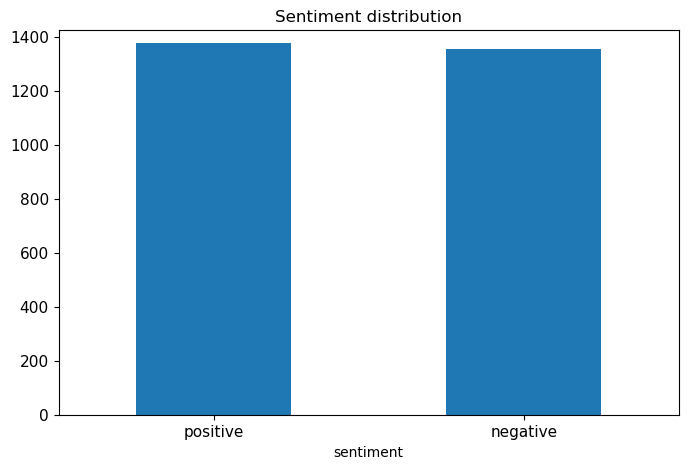

In [74]:
#visualization to see the distribution of each sentiment from original data

print(dfSentence.sentiment.value_counts())

# plot barchart for original data
upper_bound = max(dfSentence.sentiment.value_counts() + 50) 
dfSentence.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,5))

sentiment
positive    511
negative    489
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

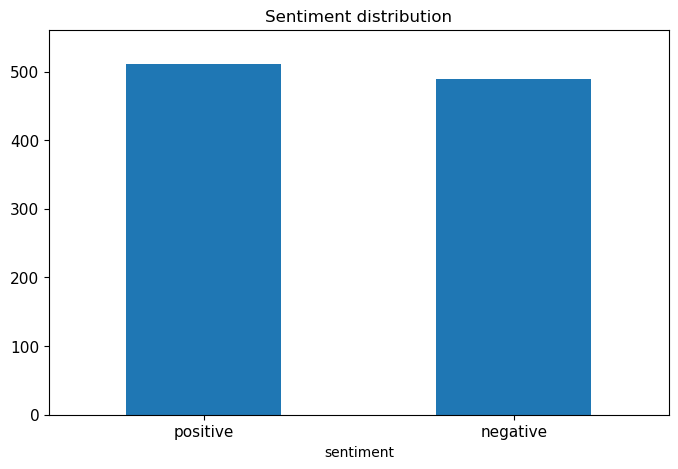

In [75]:
#visualization to see the distribution of each sentiment from sampling data

print(S_sample.sentiment.value_counts())

# plot barchart for original data
upper_bound = max(S_sample.sentiment.value_counts() + 50) 
S_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,5))

<Axes: title={'center': 'Sentiment distribution'}>

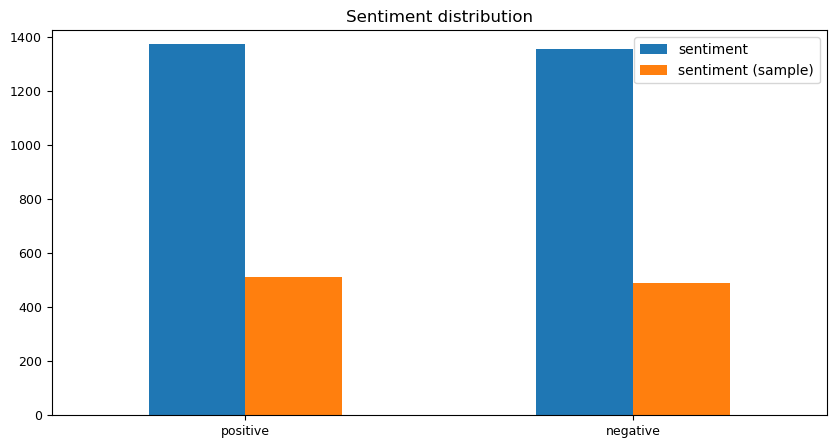

In [76]:
# Answer here

#make them side by side
numofS = dfSentence.sentiment.value_counts().rename_axis('unique_values').to_frame('sentiment')
numofSSample = S_sample.sentiment.value_counts().rename_axis('unique_values').to_frame('sentiment (sample)')

#combine the two dataframe into one based on the index and make the index as column (reset_index())
dfCountCat = pd.concat([numofS, numofSSample], axis=1).reset_index()

#calculate the highest bound 
upper_bound = max(dfSentence.sentiment.value_counts() + 50)

#plot the chart
dfCountCat.plot(kind = 'bar',
                x = 'unique_values',
                y = ['sentiment', 'sentiment (sample)'], #category_name from X and X_sample, make it side by side
                title = 'Sentiment distribution',
                xlabel = '',
                ylim = [0, upper_bound], 
                rot = 0, fontsize = 9, figsize = (10,5))

#### 2.2. Feature Creation

In [77]:
dfSentence['unigrams'] = dfSentence['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [78]:
dfSentence[:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [79]:
dfSentence[:4]

,sentence,score,source,sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin..."


In [80]:
list(dfSentence[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### 2.3. Feature Subset Selection

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectS = CountVectorizer()
S_counts = count_vectS.fit_transform(dfSentence.sentence) #learn the vocabulary and return document-term matrix
print(S_counts.shape)
print(S_counts[0])

(2731, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [82]:
analyze = count_vectS.build_analyzer()
analyze(dfSentence.sentence[1])

['good', 'case', 'excellent', 'value']

In [83]:
count_vectS.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [84]:
analyze = count_vectS.build_analyzer()
analyze(dfSentence.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [85]:
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [86]:
S_counts.shape

(2731, 5155)

In [87]:
# we convert from sparse array to normal array
S_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [88]:
print('The feature which contain 1 is :',count_vectS.get_feature_names_out()[45:46])

The feature which contain 1 is : ['45']


In [89]:
# get twenty terms 
#range 30 to 50 because ranga 2 to 20 mostly zero
plot_xS = ["term_"+str(i) for i in count_vectS.get_feature_names_out()[30:50]]
print(plot_xS)

['term_23', 'term_24', 'term_25', 'term_2mp', 'term_30', 'term_30s', 'term_325', 'term_35', 'term_350', 'term_375', 'term_3o', 'term_40', 'term_40min', 'term_42', 'term_44', 'term_45', 'term_4s', 'term_4ths', 'term_50', 'term_5020']


In [90]:
# obtain document index
plot_yS = ["doc_"+ str(i) for i in list(dfSentence.index)[30:50]]
print(plot_yS)

['doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49']


In [91]:
plot_zS = S_counts[30:50, 30:50].toarray() #X_counts[how many documents, how many terms]
print(plot_zS)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_23,term_24,term_25,term_2mp,term_30,term_30s,term_325,term_35,term_350,term_375,term_3o,term_40,term_40min,term_42,term_44,term_45,term_4s,term_4ths,term_50,term_5020
doc_30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


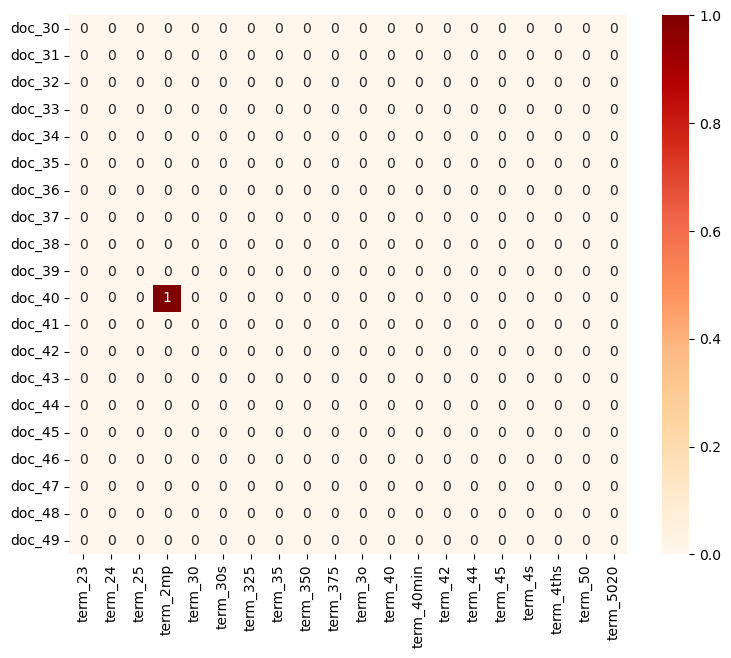

In [92]:
df_todrawS = pd.DataFrame(plot_zS, columns = plot_xS, index = plot_yS)
display(df_todrawS)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todrawS,
                 cmap="OrRd",
                 vmin=0, vmax=1, annot=True)

Make visualization fot topN frequency of terms

In [93]:
#make a dataframe of vectorizer for easier modification
dfVectS = pd.DataFrame(S_counts.toarray(), columns=count_vectS.get_feature_names_out()) 
dfVectS.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#sort the column based on the frequencies of each terms
dfVectSortS = dfVectS[dfVectS.sum().sort_values(ascending=False).index]
dfVectSortS.head()

,the,and,it,is,to,this,of,was,in,for,...,honeslty,honor,hook,hooked,hoot,hoped,hopeless,hopes,horrendous,zombiez
0,1,0,1,1,1,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#in order to show doc label in heatmap, instead of index 0,1,2,...
dfVectSortS['Doc']= ["doc_"+ str(i+1) for i in list(dfVectSortS.index)]
dfVectSortS = dfVectSortS.set_index('Doc')
dfVectSortS.head()

,the,and,it,is,to,this,of,was,in,for,...,honeslty,honor,hook,hooked,hoot,hoped,hopeless,hopes,horrendous,zombiez
Doc,,,,,,,,,,,,,,,,,,,,,
doc_1,1,0,1,1,1,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Doc'>

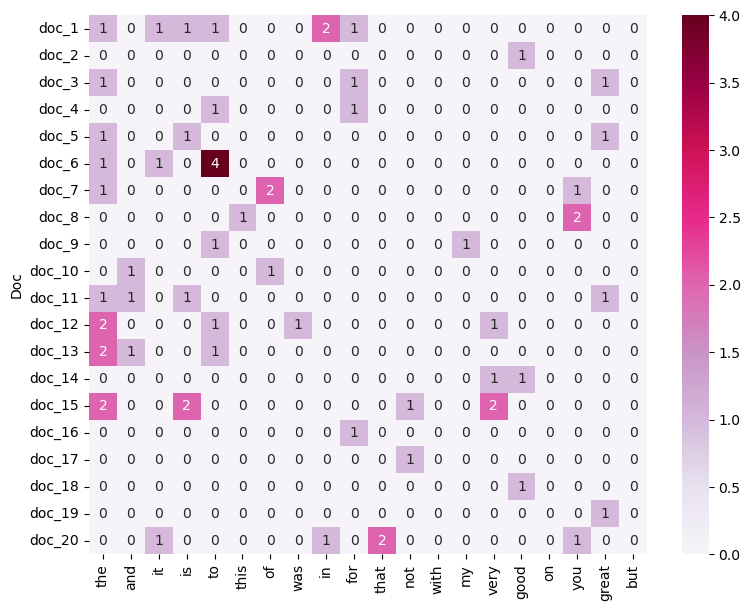

In [96]:
#show 20 highest frequency of terms

plt.subplots(figsize=(9, 7))
sns.heatmap(dfVectSortS.iloc[:20,:20],              
    cmap="PuRd",
    vmin=0, vmax=4, annot=True)

#### 2.4. Dimensionality Reduction

In [97]:
S_reduced = PCA(n_components = 3).fit_transform(S_counts.toarray())

In [98]:
S_reduced.shape

(2731, 3)

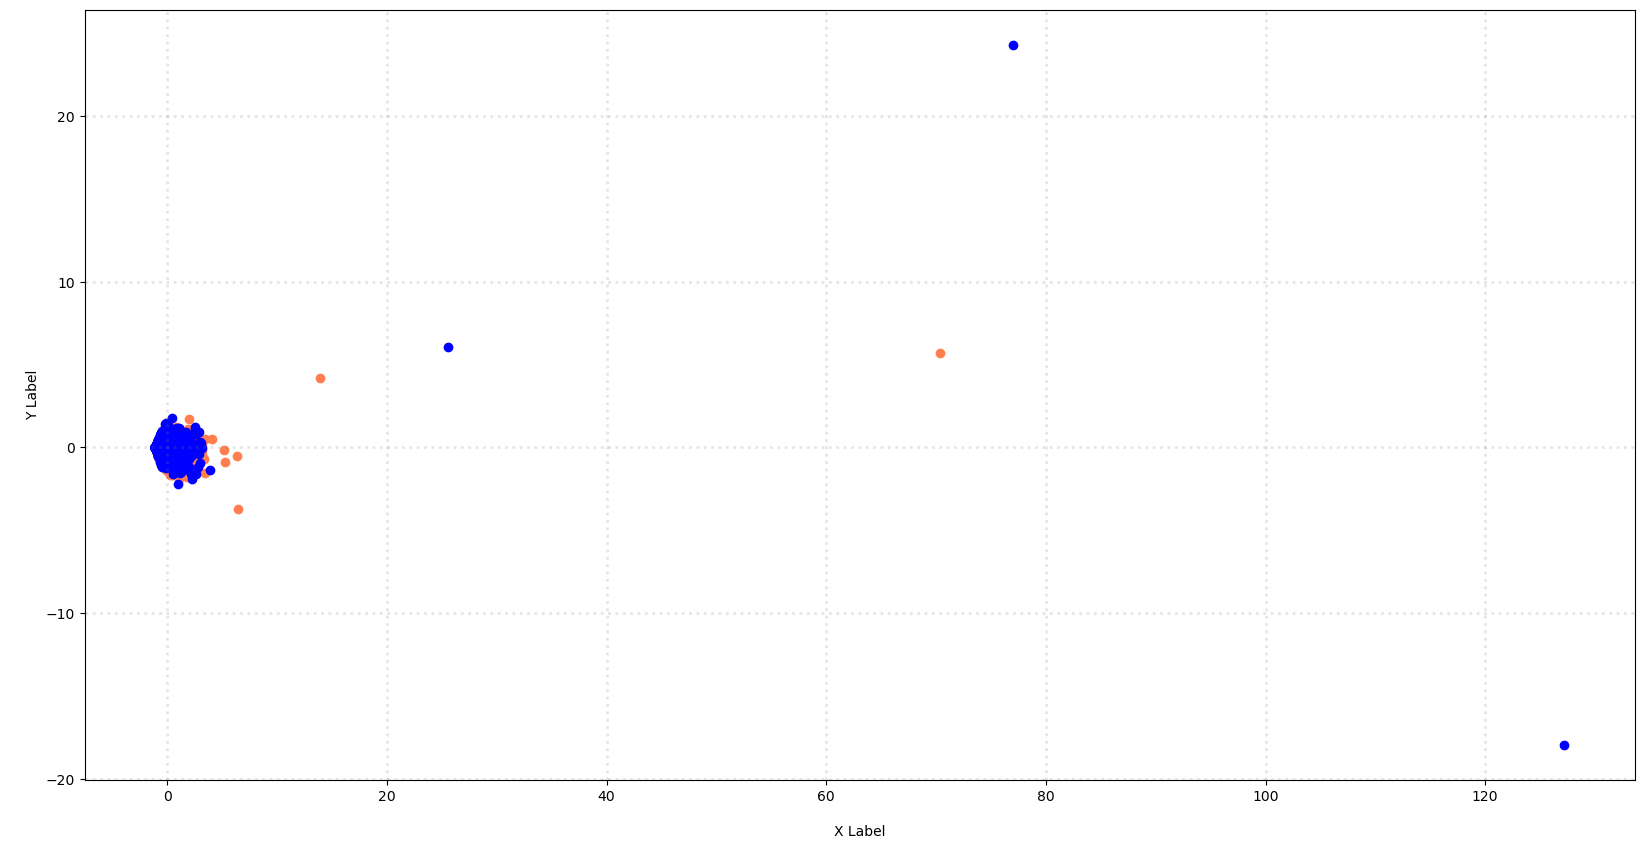

In [99]:
col = ['coral', 'blue']
senti = list(set(dfSentence.sentiment))

# plot
fig = plt.figure(figsize = (20,10))
ax = fig.subplots()

for c, senti in zip(col, senti):
    xs = S_reduced[dfSentence['sentiment'] == senti].T[0]
    ys = S_reduced[dfSentence['sentiment'] == senti].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

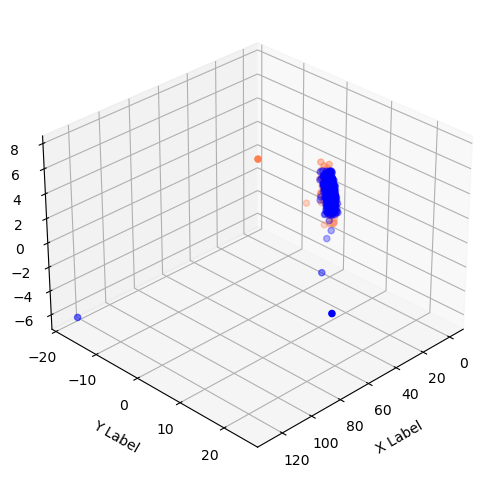

In [100]:
col = ['coral', 'blue']
senti = list(set(dfSentence.sentiment))

fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(projection='3d')

for c, senti in zip(col, senti):
    xs = S_reduced[dfSentence['sentiment'] == senti].T[0]
    ys = S_reduced[dfSentence['sentiment'] == senti].T[1]
    zs = S_reduced[dfSentence['sentiment'] == senti].T[2]

    ax1.scatter(xs, ys,zs, c = c, marker='o')
     
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.view_init(elev=30, azim=45, roll=0)  
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

plt.show()

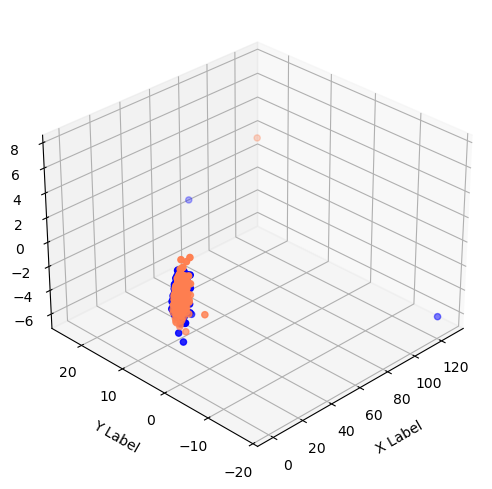

In [101]:
col = ['coral', 'blue']
senti = list(set(dfSentence.sentiment))

fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(projection='3d')

for c, senti in zip(col, senti):
    xs = S_reduced[dfSentence['sentiment'] == senti].T[0]
    ys = S_reduced[dfSentence['sentiment'] == senti].T[1]
    zs = S_reduced[dfSentence['sentiment'] == senti].T[2]

    ax1.scatter(xs, ys,zs, c = c, marker='o')
     
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.view_init(elev=30, azim=225, roll=0)  
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

plt.show()

#### 2.5. Attribute Transformation / Aggregation

In [102]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies_S = []
print(S_counts.shape[1])
for j in range(0,S_counts.shape[1]):
    term_frequencies_S.append(sum(S_counts[:,j].toarray()))

5155


In [103]:
term_frequencies_S = np.asarray(S_counts.sum(axis=0))[0]

In [104]:
term_frequencies_S[0] #sum of first term

1

Trying different way to get the sum frequency of each terms (term frequency) and save it as dataframe.
trying to reduce the computation time and easier to use later on

In [105]:
dfVectS = pd.DataFrame(S_counts.toarray(), columns=count_vectS.get_feature_names_out()) 
dfVectS.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#term frequency
termFreq = dfVectS.sum().to_frame().reset_index()
termFreq.columns=['term','freq']
termFreq.tail()

,term,freq
5150,z500a,1
5151,zero,6
5152,zillion,1
5153,zombie,2
5154,zombiez,1


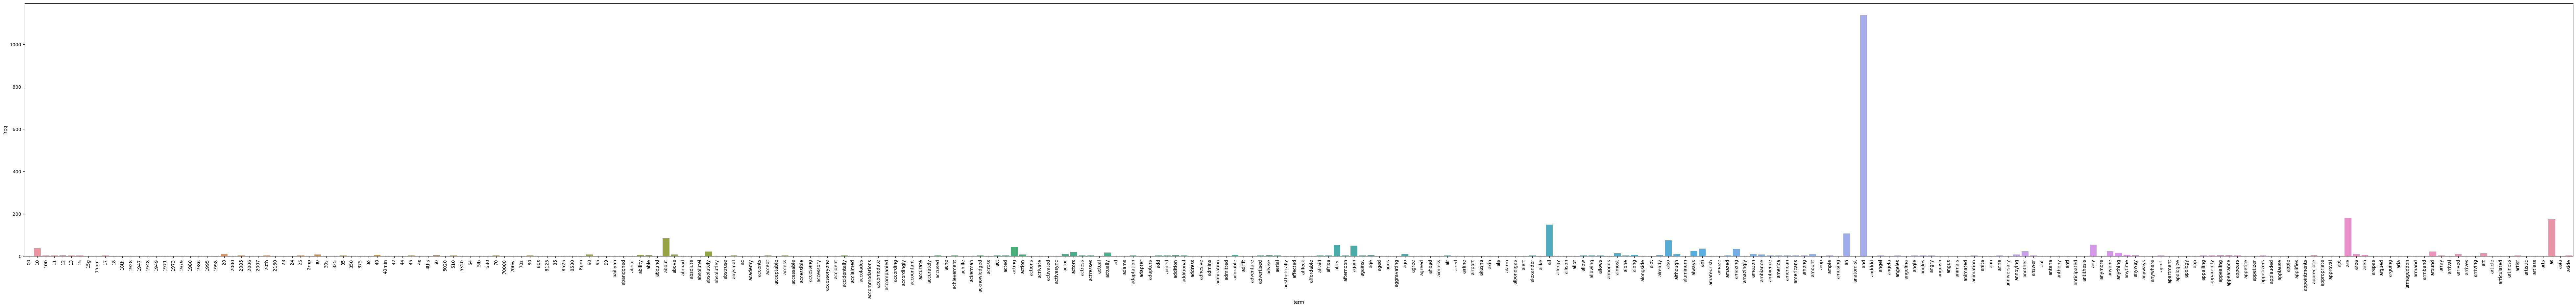

In [107]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=termFreq.term[:300], y=termFreq.freq[:300])
g.set_xticklabels(termFreq.term[:300], rotation = 90);

In [108]:
import plotly.express as px

fig = px.bar(termFreq[:300], x='term', y='freq',color='freq',
            labels={'term':'term','freq':'freq'}, color_continuous_scale='sunset')
fig.show()

visualization with reduced terms

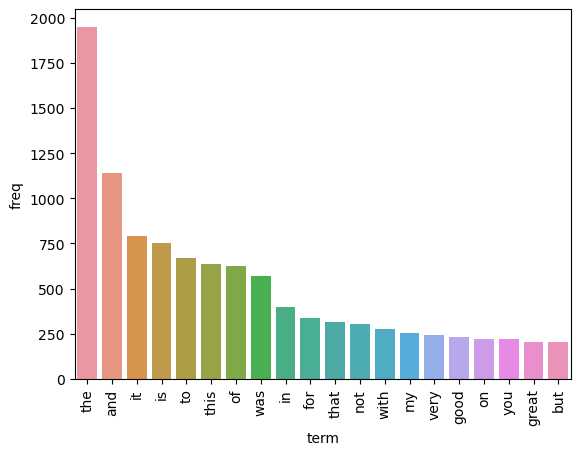

In [109]:
reduceTermS = termFreq.nlargest(20, 'freq')

g = sns.barplot(x=reduceTermS.term, 
            y=reduceTermS.freq)
g.set_xticklabels(reduceTermS.term, rotation = 90);

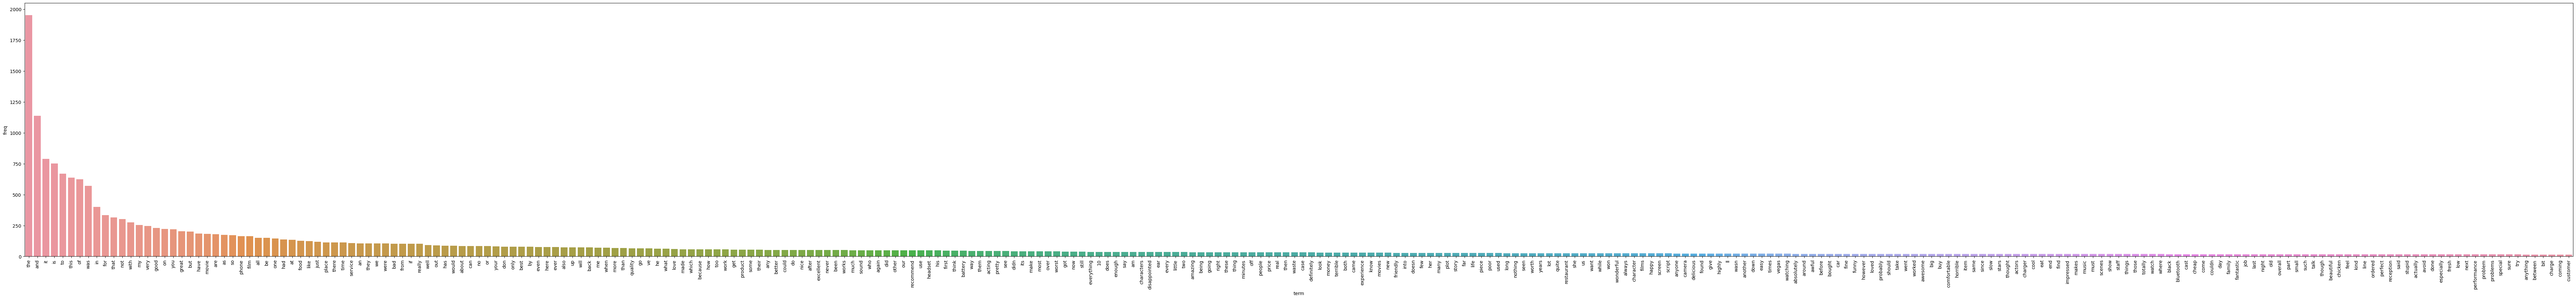

In [110]:
#long tail visualization
plt.subplots(figsize=(100, 10))

sortedtermFreq= termFreq.nlargest(300, 'freq')
g = sns.barplot(x=sortedtermFreq['term'], 
            y=sortedtermFreq['freq'])
g.set_xticklabels(sortedtermFreq['term'], rotation = 90);


In [111]:
import math
term_frequencies_logS = [math.log(i) for i in termFreq.freq]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


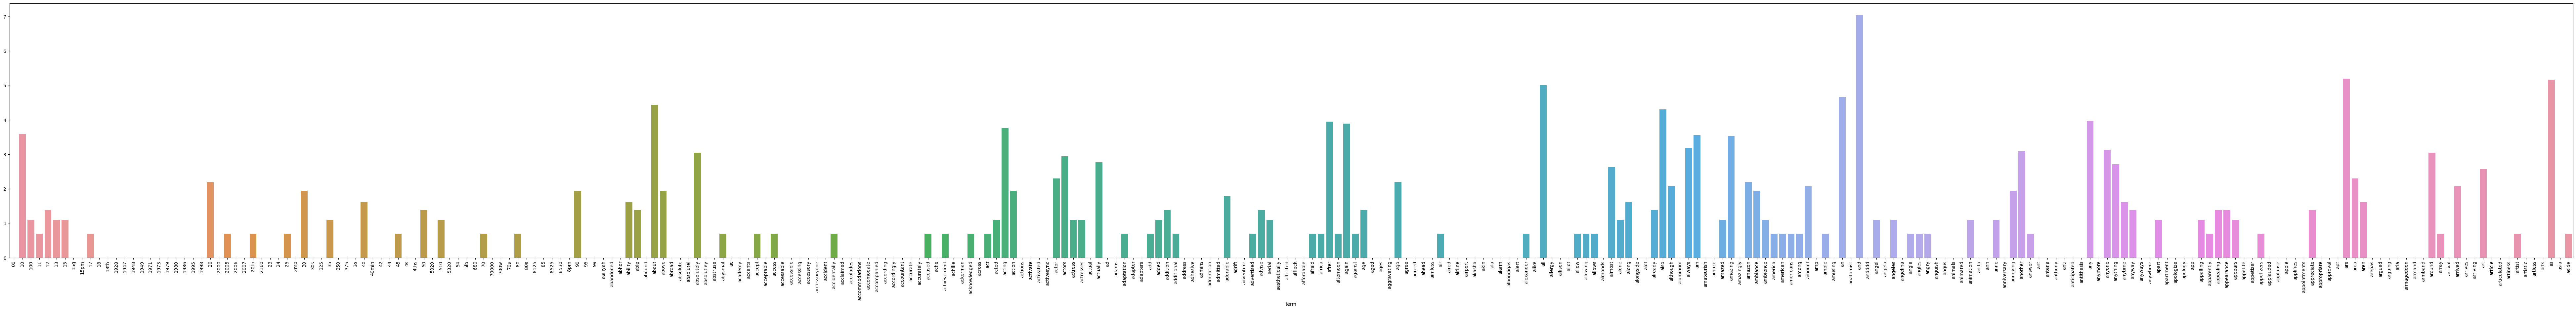

In [112]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=termFreq.term[:300],
                y=term_frequencies_logS[:300])
g.set_xticklabels(termFreq.term[:300], rotation = 90)

#### 2.6. Discretization / Binarization

In [113]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [114]:
mlb = preprocessing.LabelBinarizer()

In [115]:
mlb.fit(dfSentence.sentiment)
dfSentence['bin_sent'] = mlb.transform(dfSentence['sentiment']).tolist()

In [116]:
dfSentence[0:5]

,sentence,score,source,sentiment,unigrams,bin_sent
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Amazon,positive,"[The, mic, is, great, .]",[1]


In [117]:
dfSentence['bin_score'] = mlb.fit_transform(dfSentence['score']).tolist()

In [118]:
dfSentence[0:5]

,sentence,score,source,sentiment,unigrams,bin_sent,bin_score
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,Amazon,positive,"[The, mic, is, great, .]",[1],[1]


In [119]:
dfSentence['bin_source'] = mlb.fit_transform(dfSentence['source']).tolist()

In [120]:
dfSentence[0:5]

,sentence,score,source,sentiment,unigrams,bin_sent,bin_score,bin_source
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0],"[1, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]",[1],[1],"[1, 0, 0]"
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]",[1],[1],"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0],"[1, 0, 0]"
4,The mic is great.,1,Amazon,positive,"[The, mic, is, great, .]",[1],[1],"[1, 0, 0]"


the binarization for binary class only have 0 or 1, while if it is more than two class it has one hot encoding type 

### 3. Data Exploration

In [121]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = dfSentence.iloc[777]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = dfSentence.iloc[1777]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = dfSentence.iloc[2333]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [122]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I don't think it would hold it too securly on your belt."]
["Hard to judge whether these sides were good because we were grossed out by the melted styrofoam and didn't want to eat it for fear of getting sick."]
['I really enjoyed Crema Café before they expanded; I even told friends they had the BEST breakfast.']


In [123]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vectS.transform(document_to_transform_1)
document_vector_count_2 = count_vectS.transform(document_to_transform_2)
document_vector_count_3 = count_vectS.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [124]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.098058
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.042875
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Third Part
Please attempt the following tasks on the new dataset.

1. Generate meaningful new data visualizations.
2. Generate TF-IDF features from the tokens of each text. 
3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. 

### 1.Visualize Meaningful Data

first drop unnecessary column from previous process. unigram will also be remove because I only use sentence part and get the tokenize sentence through vectorizer.

In [125]:
dfSentence = dfSentence.drop(['bin_sent','bin_score','bin_source','unigrams'],axis=1)

In [126]:
dfSentence

,sentence,score,source,sentiment
0,So there is no way for me to plug it in here i...,0,Amazon,negative
1,"Good case, Excellent value.",1,Amazon,positive
2,Great for the jawbone.,1,Amazon,positive
3,Tied to charger for conversations lasting more...,0,Amazon,negative
4,The mic is great.,1,Amazon,positive
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,Yelp,negative
2744,Appetite instantly gone.,0,Yelp,negative
2745,Overall I was not impressed and would not go b...,0,Yelp,negative
2746,"The whole experience was underwhelming, and I ...",0,Yelp,negative


#### Get Meaningful Terms

One way to get meaningful words is  using word cloud visualization, although it might not necessarily show the term with highest frequency because it eliminate high occurence words that not really meaningful

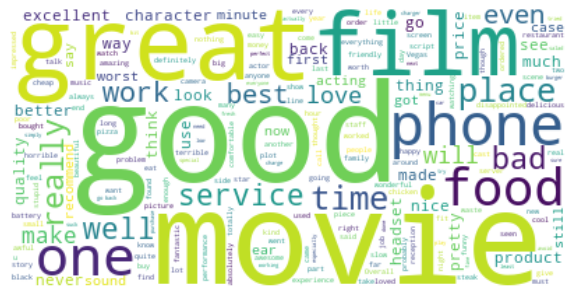

In [127]:
import helpers.text_analysis as ta

allwords = ''
for text in dfSentence.sentence:
    allwords += text

ta.plot_word_cloud(allwords)

Another way to see meaningful terms is to visualize using heatmap or barchart like the previous one. 
To reduce the number of unnecessary words, we can try to remove stopword

In [128]:
from nltk.corpus import stopwords

#make a set of stopwords
listStopWords = set(stopwords.words('english'))
#listStopWords

In [129]:
#remove stopwords using function build in data mining helper (addition)
dfSentence['cleanText'] = dfSentence['sentence'].apply(lambda x: dmh.cleaning(x,listStopWords))

In [130]:
dfSentence.head()

,sentence,score,source,sentiment,cleanText
0,So there is no way for me to plug it in here i...,0,Amazon,negative,So way plug US unless I go converter .
1,"Good case, Excellent value.",1,Amazon,positive,"Good case , Excellent value ."
2,Great for the jawbone.,1,Amazon,positive,Great jawbone .
3,Tied to charger for conversations lasting more...,0,Amazon,negative,Tied charger conversations lasting 45 minutes....
4,The mic is great.,1,Amazon,positive,The mic great .


In [131]:
countVectAll = CountVectorizer()
vectWords = countVectAll.fit_transform(dfSentence.cleanText)

In [132]:
dfvw = pd.DataFrame(vectWords.toarray(), columns=countVectAll.get_feature_names_out()) 
dfvw.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
tfall = dfvw.sum().to_frame().reset_index()
tfall = tfall.set_axis(['term', 'freq'], axis=1)

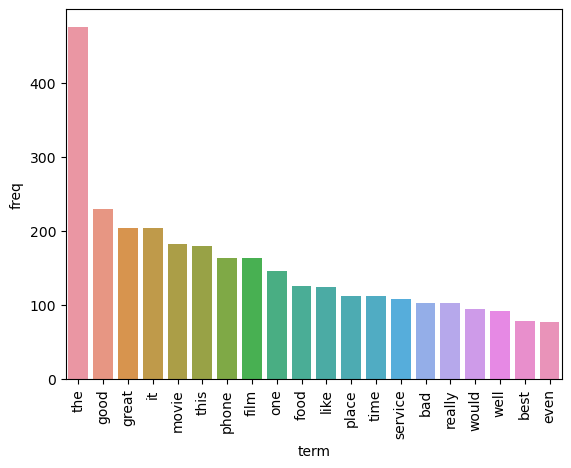

In [134]:
g = sns.barplot(x=tfall.nlargest(20,'freq').term, 
            y=tfall.nlargest(20,'freq').freq)
g.set_xticklabels(tfall.nlargest(20,'freq').term, rotation = 90);

### 2. Classification

Because we need to classify, then first we need to split the dataset into training set and testing set before vectorizing because we only want to model using training set.

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [136]:
#split training and testing set
x_train, x_test, y_train, y_test = train_test_split(dfSentence.cleanText, 
                        dfSentence.score , test_size=0.25, random_state=42)

In [137]:
#make a new count vectorizer
countVect = CountVectorizer()
x_train_count = countVect.fit_transform(x_train)

In [138]:
#fit test set to the x_train vectorizer

x_test_count = countVect.transform(x_test)

In [139]:
#make a tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectTfidf = TfidfVectorizer()
x_train_tfidf = vectTfidf.fit_transform(x_train)

In [140]:
x_test_tfidf = vectTfidf.transform(x_test)

#### Naive Bayes Classifier with Word Count

In [141]:
clf_mnb = MultinomialNB()
clf_mnb.fit(x_train_tfidf, y_train)

#predict all x test
y_pred_mnb = clf_mnb.predict(x_test_count)
y_pred_mnb

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [142]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       342
           1       0.75      0.84      0.79       341

    accuracy                           0.78       683
   macro avg       0.79      0.78      0.78       683
weighted avg       0.79      0.78      0.78       683



(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

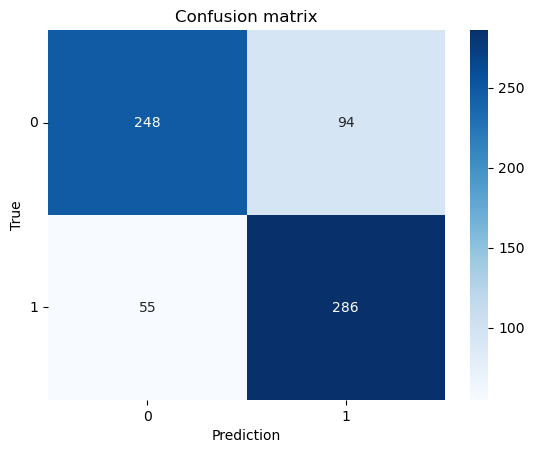

In [143]:
classes = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred_mnb)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
ax.set(xlabel="Prediction", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

#### Naive Bayes Classifier with TFIDF

In [144]:
clf_mnb.fit(x_train_tfidf, y_train) #retrain using tfidf vectorizer

y_pred_tfidf_mnb = clf_mnb.predict(x_test_tfidf)
y_pred_tfidf_mnb

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [145]:
print(classification_report(y_test, y_pred_tfidf_mnb))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       342
           1       0.77      0.84      0.80       341

    accuracy                           0.79       683
   macro avg       0.79      0.79      0.79       683
weighted avg       0.79      0.79      0.79       683



(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

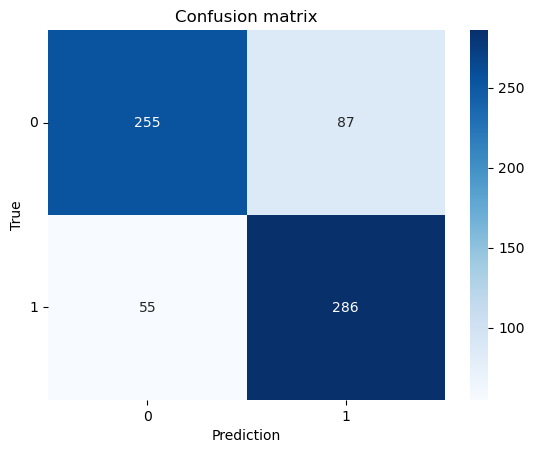

In [146]:
classes = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred_tfidf_mnb)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
ax.set(xlabel="Prediction", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

#### Classification without removing stop words

using the original sentence from the reviews dataset

In [147]:
x_trainall, x_testall, y_trainall, y_testall = train_test_split(dfSentence.sentence, 
                        dfSentence.score , test_size=0.25, random_state=42)

In [148]:
countVectall = CountVectorizer()
x_train_call = countVectall.fit_transform(x_trainall)

tfidfVectall = TfidfVectorizer()
x_train_tall = tfidfVectall.fit_transform(x_trainall)

In [149]:
x_test_call = countVectall.transform(x_testall)
x_test_tall = tfidfVectall.transform(x_testall)

In [150]:
clf_mnb.fit(x_train_call, y_trainall)
y_pred_a = clf_mnb.predict(x_test_call)
print(classification_report(y_testall, y_pred_a))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       342
           1       0.80      0.77      0.78       341

    accuracy                           0.79       683
   macro avg       0.79      0.79      0.79       683
weighted avg       0.79      0.79      0.79       683



In [151]:
clf_mnb.fit(x_train_tall, y_trainall)
y_pred_tfidf_a = clf_mnb.predict(x_test_tall)
print(classification_report(y_testall, y_pred_tfidf_a))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       342
           1       0.79      0.79      0.79       341

    accuracy                           0.79       683
   macro avg       0.79      0.79      0.79       683
weighted avg       0.79      0.79      0.79       683



The classification done using text without stopwords, it split into 75% of training set and 25% of testing set. The data then vectorize using countVectorizer and TFIDF and built two classifier model using multinomial naive bayes from sklearn library. From the accuracy of both classifier, it can be seen that the accuracy did not differ much, although TFIDF is 1% better than word frequency. However, using the original sentence (without removing stopwords), the result of both word frequency and tfidf is similar, only a tiny difference on the recall and precision for each class. 

### Fourth Part

Inefficient parts

Answer : 
1. for the feature creation part, if we will not doing anything for each token (not doing stopword, stemming or correction of words), then the purpose of making the unigram is a bit loss because we do not need to use the token for processing the data. We could use vectorizer and we will get a vector that we can use directly in the classification. Generating the unigrams takes a bit of time so if we are not going to use the tokens generated from tokenization then it might be good to remove it and directly use vectorizer.

2. In attribut transformation part, to find the total frequency of each terms and then it still needs to change into array. I think it is better to directly transform the vector from vectorizer to dataframe and then built the frequency by using .sum() of dataframe. This way, we didn't do the loop (for ...) but directly apply a function like the code below.

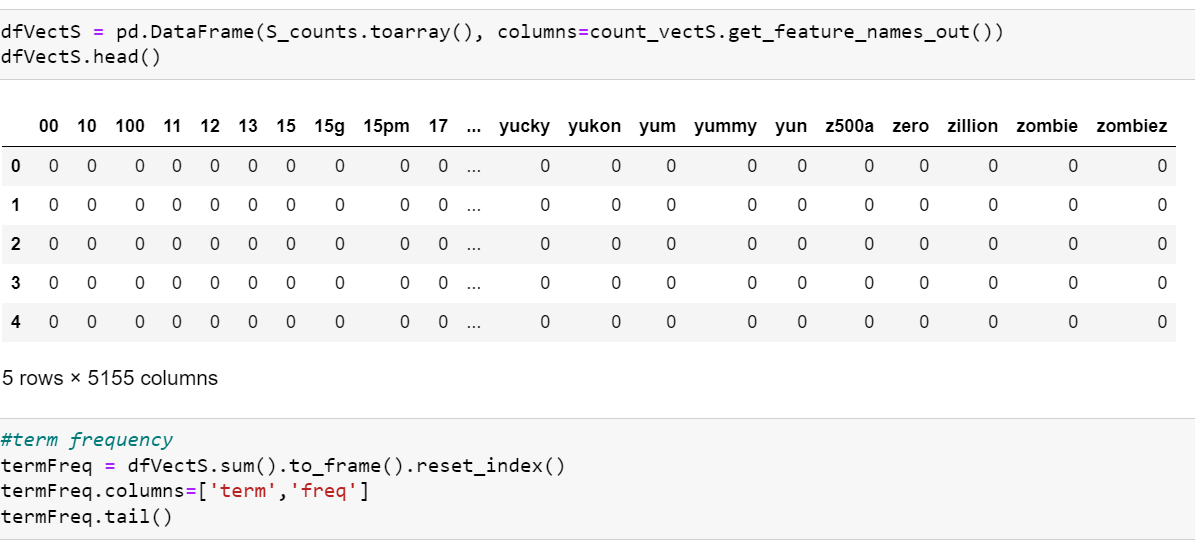

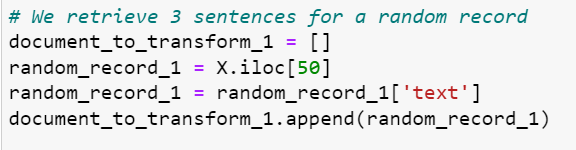

3. In data exploration, to get the random records, we do the above code. However, i do think there is no need to store each of the text inside a separate list. We can just use the text directly for vectorizer. Also I think we can just use sample() if we want to compare totally random records, instead of querying the data one by one. Then we can directly use the text from pandas for vectorizing and calculate the cossine simmilarity. In addition, the binarization seems useless because they are not called after. a propose code to make the code shorter is like this

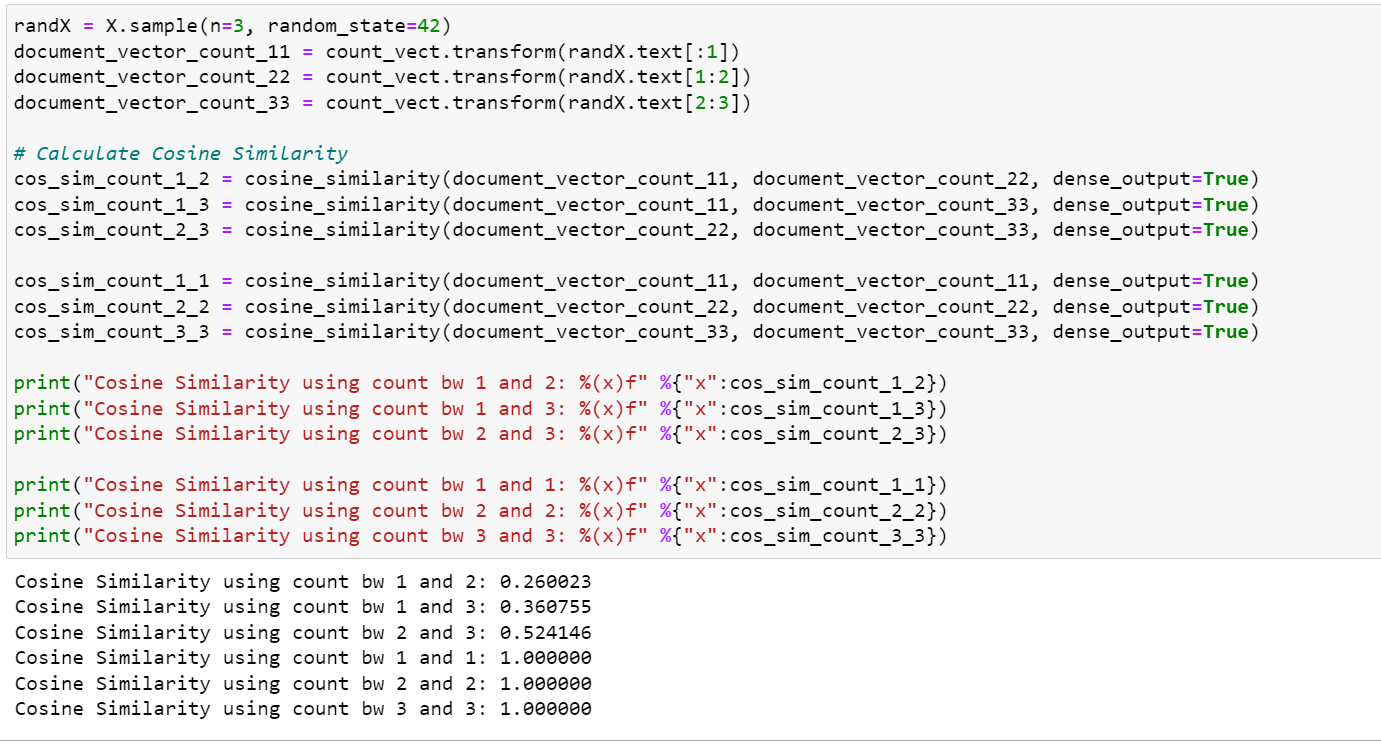

4. Different data set need different type of preprocessing. For example email dataset will have many certain words like from and subject, if our purpose is only doing simple classification, without the need to identify which email from which user or grouping the email based on subject, user etc then we might need to remove this words because most likely it will show up in all documents. However, for dataset like review, we might not necessarily remove frequently occured words because reviews usually are similar to one another and use similar words like good and great. 